## POE5 Chapter 3: Interval Estimation and Hypothesis Testing

## 3.1 Interval Estimates

**POE5 Example 3.1 Interval Estimate for the Food Expenditure Data**

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_excel('food.xlsx')

df['const'] = 1

reg = sm.OLS(endog=df['food_exp'],exog=df[['const','income']])

results = reg.fit()

print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.369   
Dependent Variable: food_exp         AIC:                475.0176
Date:               2020-07-27 18:12 BIC:                478.3954
No. Observations:   40               Log-Likelihood:     -235.51 
Df Model:           1                F-statistic:        23.79   
Df Residuals:       38               Prob (F-statistic): 1.95e-05
R-squared:          0.385            Scale:              8013.3  
-------------------------------------------------------------------
           Coef.    Std.Err.     t      P>|t|     [0.025    0.975] 
-------------------------------------------------------------------
const     83.4160    43.4102   1.9216   0.0622   -4.4633   171.2953
income    10.2096     2.0933   4.8774   0.0000    5.9721    14.4472
-----------------------------------------------------------------
Omnibus:               0.277        Durbin-Watson:          1.894
Prob(Omnibus):   

If we want to view the summary output with a different confidence interval, we can specify that as a keyword argument to summary2().  For example, to return a 90% interval, we would enter 


In [2]:
print(results.summary2(alpha=0.1))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.369   
Dependent Variable: food_exp         AIC:                475.0176
Date:               2020-07-27 18:12 BIC:                478.3954
No. Observations:   40               Log-Likelihood:     -235.51 
Df Model:           1                F-statistic:        23.79   
Df Residuals:       38               Prob (F-statistic): 1.95e-05
R-squared:          0.385            Scale:              8013.3  
-------------------------------------------------------------------
           Coef.    Std.Err.     t      P>|t|     [0.05     0.95]  
-------------------------------------------------------------------
const     83.4160    43.4102   1.9216   0.0622   10.2284   156.6036
income    10.2096     2.0933   4.8774   0.0000    6.6805    13.7388
-----------------------------------------------------------------
Omnibus:               0.277        Durbin-Watson:          1.894
Prob(Omnibus):   

If for whatever reason we simply want to print out the confidence interval alone, we can enter

In [3]:
results.conf_int(alpha=0.10,cols=None)    # 90% CI

,0,1
const,10.228444,156.60356
income,6.680496,13.73879


### 3.1.1 Critical values from the $t$ distribution

Here we have 38 degrees of freedome.  This is stored in `res.df_resid`, but for the examples here lets just use the number directly.

We import the `t` package from scipy.stats which gives us access to the function `ppf(q,*args)` which is the *percent point function*, (inverse of `cdf`) at $q$.  It returns the quantile corresponding to the lower tail probability $q$.

In [4]:
from scipy.stats import t

print(f"t critical value 97.5 percentile = {t.ppf(0.975,38):.3f}")

t critical value 97.5 percentile = 2.024


Here are some additional examples

In [5]:
print(f"t(30) 95th percentile = {t.ppf(0.95,30):.3f}")
print(f"t(20)  5th percentile = {t.ppf(0.05,20):.3f}")
print(f"t(30) 2.5th percentile = {t.ppf(0.025,30):.3f}")

t(30) 95th percentile = 1.697
t(20)  5th percentile = -1.725
t(30) 2.5th percentile = -2.042


### 3.1.2 Creating an Interval Estimate

The coefficients and standard errors are available in `results.params` and `results.bse`.

The *b* in `bse` is a historical artifact from the linear model y = X b + u. It would cause less confusion if this object was instead named params_se in parallel with params, but bse it is for the forseeable future.

In [6]:
print(results.params)
print(results.bse)

const     83.416002
income    10.209643
dtype: float64
const     43.410163
income     2.093264
dtype: float64


We can access the variables individually and give our results in a more readable format as follows:

In [7]:
slope     = results.params.income
slope_err = results.bse.income
intcp     = results.params.const
intcp_err = results.bse.const

print(f"Best-fit slope = {slope:.2f} +- {slope_err:.2f}")
print(f"Best-fit intercept = {intcp:.2f} +- {intcp_err:.2f}")

Best-fit slope = 10.21 +- 2.09
Best-fit intercept = 83.42 +- 43.41


We can use these values to obtain a 95% interval estimate ourselves.  Comparing with the table above we see that they agree.

In [8]:
tc975 = t.ppf(0.975,38)

ub1 = intcp + tc975*intcp_err
lb1 = intcp - tc975*intcp_err
ub2 = slope + tc975*slope_err
lb2 = slope - tc975*slope_err

print(f"β1 95% interval estimate is {lb1:.2f} to {ub1:.2f}")
print(f"β2 95% interval estimate is {lb2:.2f} to {ub2:.2f}")

β1 95% interval estimate is -4.46 to 171.30
β2 95% interval estimate is 5.97 to 14.45


### 3.1.3 Creating an interval estimate using a linear combination of parameters

We can use the method `results.t_test(r)` with argument `r` to return an interval estimate.  The array `r` is simply the coefficients of the linear combination of our regression parameters, $r_0\beta_0 + r_1\beta_1$.  For example, if we let $r_0=0$ and $r_1=1$, then the linear combination is $r_0\beta_0 + r_1\beta_1 = \beta_1$.

In [9]:
r = [0, 1]

print(results.t_test(r))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.2096      2.093      4.877      0.000       5.972      14.447


Similarly, for `r = [1,0]`, we have:

In [10]:
r = [1,0]

print(results.t_test(r))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            83.4160     43.410      1.922      0.062      -4.463     171.295


And a quick check with the summary results from Example 3.1 above confirms that these agree with that output.

---
## 3.2 Hypothesis Tests

### 3.2.1 Right-tail test of significance

**POE5 Example 3.2 Right-Tail Test of Significance**



In [11]:
tstat0 = results.params.income/results.bse.income
print(f"t statistic for H0 = {tstat0:.2f}")
print(f"t(38) 95th percentile = {t.ppf(0.95,38):.2f}")

t statistic for H0 = 4.88
t(38) 95th percentile = 1.69


---
### 3.2.2 Right-Tail Test of an Economic Hypothesis

**Example 3.3 Right-Tail Test of an Economic Hypothesis**

In [12]:
tstat1 = (results.params.income-5.5)/results.bse.income
print(f"t statistic for H0: β2 = 5.5 is {tstat1:.2f}")
print(f"t(38) 99th percentile = {t.ppf(0.99,38):.2f}")

t statistic for H0: β2 = 5.5 is 2.25
t(38) 99th percentile = 2.43


When calling the `t_test()` function we passed *array-like* list `r = [0,1]` (for example),
but we can alternatively call `t_test()` with a string (actual string or string variable) that contains the behavior we're wanting to explore.  Here, 

In [13]:
hypothesis = 'income-5.5'
print(results.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.2096      2.093      2.250      0.030       5.972      14.447


Here the $t$-statistic is 2.25 along with the 95\% confidence interval.  It is important to note that the values of `coef` and the confidence interval limits are indicitive of the original (`income`) data.  This is different from the behavior of, for example `lincom` from Stata.  Stata's `lincom` function would return these three values as 4.7096, 0.4720 and 8.9472.  

---
### 3.2.3 Left-Tail Test of an Economic Hypythesis
**POE5 Example 3.4 Left-Tail Test of an Economic Hypythesis**

In [14]:
tstat2 = (results.params.income-15)/results.bse.income
print(f"t statistic for H0: β2 = 15 is {tstat2:.2f}")

t statistic for H0: β2 = 15 is -2.29


In [15]:
print(f"t(38) 95th percentile = {t.ppf(0.05,38):.2f}")

t(38) 95th percentile = -1.69


In [16]:
hypothesis = 'income-15'
print(results.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.2096      2.093     -2.288      0.028       5.972      14.447


---
### 3.2.4 Two-Tail Test of an Economic Hypythesis
**POE5 Example 3.5 Two-Tail Test of an Economic Hypythesis**

In [17]:
tstat3 = (results.params.income-7.5)/results.bse.income
print(f"t statistic for H0: β2 = 7.5 is {tstat3:.2f}")

t statistic for H0: β2 = 7.5 is 1.29


In [18]:
print(f"t(38) 97.5th percentile = {t.ppf(0.975,38):.2f}")

t(38) 97.5th percentile = 2.02


In [19]:
print(f"t(38)  2.5th percentile = {t.ppf(0.025,38):.2f}")

t(38)  2.5th percentile = -2.02


In [20]:
hypothesis = 'income-7.5'
print(results.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.2096      2.093      1.294      0.203       5.972      14.447


---
### 3.2.5 Two-Tail test of significance

(discussion of we had this in standard output), 

In [21]:
print(results.t_test('income'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.2096      2.093      4.877      0.000       5.972      14.447


In [22]:
print(results.t_test('const'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            83.4160     43.410      1.922      0.062      -4.463     171.295


---
## 3.3 $p$-Values

Ability to determine $p$-values is an extremely useful function of Statsmodels.

* If $H_1:\beta_k>c,p =$ probability to the right of $t$
* If $H_1:\beta_k<c,p =$ probability to the left of $t$
* If $H_1:\beta_k\ne c,p =$ sum of probabilities to the right of $|t|$ and to the left of $-|t|$

Critical values for the $t$ distribution are available by a variety of means, including published tables (e.g., https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm) or via computation.  However, $p$-values must be computed.

For this, we again use the `scipy.stats.t` package, specifically the function `sf` (where *sf* is short for *survival function* defined as 1-`cdf`

### 3.3.1 $p$-value of a right-tail test
**POE5 Example 3.3 (continued) $p$-value for Right-tail Test**

In [23]:
print(f"p value right tail test H0:β2 = 5.5 is {t.sf(tstat1,38):.4f}")

p value right tail test H0:β2 = 5.5 is 0.0152


---
### 3.3.2 p-value of a left-tail test
**POE5 Example 3.4 (cont) p-value for Left-Tail Test**

In [24]:
print(f"p value left tail test H0:β2 = 15 is {1-t.sf(tstat2,38):.4f}")

p value left tail test H0:β2 = 15 is 0.0139


Carter's Stata manual doesn't have this, but shouldn't we:

And of course by the definition of the survival function (1-`cdf`), we can also compute this value from

In [25]:
print(f"p value left tail test H0:β2 = 15 is {t.cdf(tstat2,38):.4f}")

p value left tail test H0:β2 = 15 is 0.0139


---
### 3.3.3 p-value for a two-tail test
**POE5 Example 3.5 (cont) p-value for Two-Tail Test**

See Stata manual.  Let me know if you want to explain it this way and if this needs to be split up as it is there.

In [26]:

p3 = 2 * t.sf(tstat3,38)  # see text for explanation of factor of 2
print(f"p value two tail test H0:β2 = 7.5 is {p3:.4f}")

p value two tail test H0:β2 = 7.5 is 0.2033


### 3.3.4 p-values in Stata Output

(nothing that really goes into a notebook - section refers to previous cells' results)

### 3.3.5
**POE5 Example 3.7 Estimating Expected Food Expenditure, and
POE5 Example 3.8 An Interval Estimate of Expected Food Expenditure**

Linear hypothesis
$$H_0:c_0\beta_0 + c_1\beta_1 = c_?$$

Test uses $t$-statistic
$$ t = \frac{(c_0\beta_0 + c_1\beta_1)-c}{{\rm se}(c_0\beta_0 + c_1\beta_1)}$$

Standard Error in the denominator is the square root of

$$
\widehat{{\rm var}[c_0b_0 + c_1b_1]} = \widehat{c_0^2{\rm var}(b_0)} + 
\widehat{c_1^2{\rm var}(b_1)} + \widehat{2c_0c_1{\rm cov}(b_0b_1)}
$$

To compute this value we can use the estimated covariance matrix of the least squares estimates which are stored in `res.cov_params()`

In [27]:
print(results.cov_params())

              const     income
const   1884.442263 -85.903157
income   -85.903157   4.381752


In [28]:
print(results.t_test('const + income*20'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           287.6089     14.178     20.286      0.000     258.907     316.311


**POE5 Example 3.9 Testing Expected Food Expenditure**

To test the null hypythesis that this linear combination equals 250 (POE Example 3.9), use

In [29]:
print(results.t_test('const + income*20 = 250'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           287.6089     14.178      2.653      0.012     258.907     316.311


Again note that if you are comparing directly to Stata results, Stata subtracts 250 from the `coef` and confidence interval limit values.

---
## Appendix 3A Graphical Tools


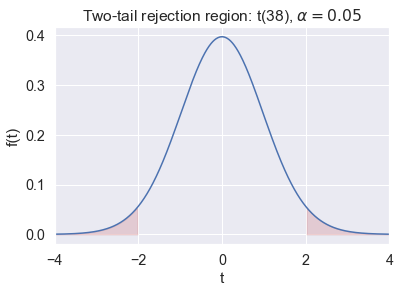

In [30]:
# Two-tail rejection region for t(38), alpha = 0.05

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t

sns.set(font_scale=1.3)

ndf = 38

tleft  = t.ppf(0.025,ndf)   # -2.024
tright = t.ppf(0.975,ndf)   #  2.024

left_tail  = np.arange(-5,tleft, 0.001) 
right_tail = np.arange(tright, 5, 0.001) 
x_all = np.arange(-5, 5, 0.01) 

yleft  = t.pdf(left_tail,ndf)
yright = t.pdf(right_tail,ndf)
y_all  = t.pdf(x_all,ndf)

# build the plot
fig, ax = plt.subplots()

sns.lineplot(x_all,y_all)

ax.fill_between(left_tail,yleft,0, color='r',alpha=0.2)
ax.fill_between(right_tail,yright,0, color='r',alpha=0.2)
ax.set_xlim([-4,4])
ax.set_xlabel('t')
ax.set_ylabel('f(t)')
ax.set_title(r'Two-tail rejection region: t(38), $\alpha=0.05$')

plt.show()

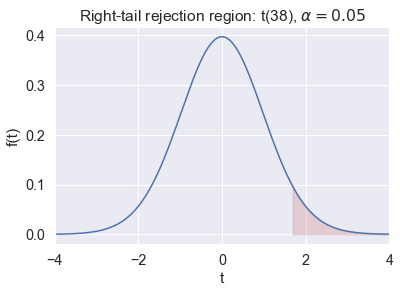

In [31]:
# Right-tail rejection region for t(38), alpha = 0.05

ndf = 38

tright = t.ppf(0.95,ndf)   #  1.686

right_tail = np.arange(tright, 5, 0.001) 
x_all = np.arange(-5, 5, 0.01) 

yright = t.pdf(right_tail,ndf)
y_all  = t.pdf(x_all,ndf)

# build the plot
fig, ax = plt.subplots()

sns.lineplot(x_all,y_all)

ax.fill_between(right_tail,yright,0, color='r',alpha=0.2)
ax.set_xlim([-4,4])
ax.set_xlabel('t')
ax.set_ylabel('f(t)')
ax.set_title(r'Right-tail rejection region: t(38), $\alpha=0.05$')

plt.show()

## Appendix 3B Monte Carlo Simulation

Here we have a code that is a little more involved that we've seen up to this point.  Let us step through what it is doing.

First, because this is a longer example, you may want to cut/paste into Spyder for your experimenting, and for that reason we have made this a self-contained example, not relying on any of the cells above.

* We read in the packages that we need and set our `font_scale=1.3` so labels are a good size.
* We set a pseudo-random seed so we have the same sequence (your plots should look exactly like these for `seed(42)` and different every time if you comment this out (try it!).
* We set our model parameters for $\beta_0$, $\beta_1$, $\sigma$, etc., and initialize the lists `beta0hat` and `beta1hat` that will hold our 1000 estimates of $\hat\beta_0$ and $\hat\beta_1$
* Next we set the 20 `x` values such that the first 20 values are $x_i = 10$ for $i=0,1,\ldots9$ and then the remaining 20 samples have $x_i = 20$ for $i=10,\ldots,19$.  
* This gives $y_i=200$, for $i=0,\ldots9$, and $y_i=300$, for $i=10,\ldots19$.  
* In the main loop, we 
    * randomize the `y` values with values drawn from a Gaussian normal distribution of width `sigma`,
    * use `np.polyfit` to return the linear-least squares estimates of $\hat\beta_0$ and $\hat\beta_1$ for the current sample
    * store those estimates in lists for later use
    
* Finally, we plot
    * The final sample, best fit line, and the best-fit-line solution on the plot. 
    * The distribution of estimates of $\beta_0$ and $\beta_1$.  Note that these appear fairly normal, and will be moreso as `nsameples` is increased (try it!).


Text(0, 0.5, 'count')

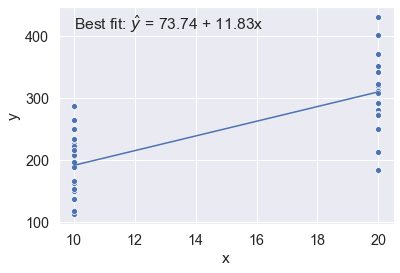

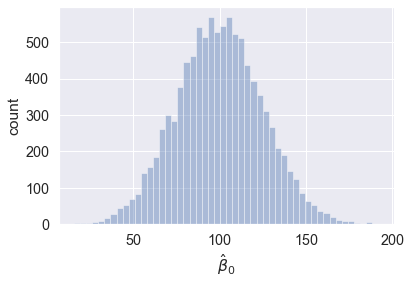

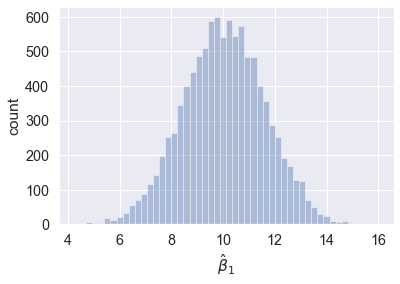

In [32]:
import numpy as np
from numpy.random import seed, randn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
seed(42)  # So we get the same pseudo-random sequence every time

nobs = 40
beta0 = 100
beta1 = 10
sigma = 50
nsamples = 10000

beta0hat = []  # list of best-fit beta0
beta1hat = []  # list of best-fit beta1

x = 20*[10] + 20*[20]  # first 20 elements are '10', second 20 are '20'
x = np.array(x)  # make it a NumPy array
y0 = beta0 + beta1*x

for i in range(nsamples):
    y = y0 + sigma*randn(nobs)
    c = np.polyfit(x,y,1)        # Obtain best fine line
    beta0hat.append(c[1])           # Store intercept est in list
    beta1hat.append(c[0])           # Store slope est in list

fig, ax = plt.subplots()

sns.scatterplot(x,y)

ax.set_xlabel('x')
ax.set_ylabel('y')
x_fit = np.linspace(10,20,10)
y_fit = c[1] + c[0] * x_fit
sns.lineplot(x_fit,y_fit)
s = f"Best fit: $\hat y$ = {c[1]:.2f} + {c[0]:.2f}x"
ax.text(10, 410, s, horizontalalignment='left')

fig, ax = plt.subplots()

sns.distplot(beta0hat,kde=False)
ax.set_xlabel(r"$\hat\beta_0$")
ax.set_ylabel("count")

fig, ax = plt.subplots()
sns.distplot(beta1hat,kde=False)
ax.set_xlabel(r"$\hat\beta_1$")
ax.set_ylabel("count")

Here we are bringing in the pandas package, and populating a DataFrame with our same variables as above, but also we will now keep track of the formal errors in new lists.

Need to look at this to make sure we're doing what is needed. ... I think there's some code we can take out, but I might have guessed wrong on what we're reporting here.


In [33]:
import numpy as np
import pandas as pd
from numpy.random import seed, randn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import t

#seed(42)

nobs = 40
beta1 = 100
beta2 = 10
sigma = 50
nsamples = 10000
tc975 = t.ppf(0.975,nobs-2)

intcp     = []  # list of best-fit beta0
intcp_err = []  # best-fit beta0 err
slope     = []  # best-fit beta1
slope_err = []  # best-fit beta1 err
ub = []         # CI upper bound
lb = []         # CI lower bound
tstat = []      # t statistic

df = pd.DataFrame(columns=['x','y','const'])
df.x = 20*[10] + 20*[20]  # first 20 elements are '10', second 20 are '20'
y0 = beta1 + beta2*df.x
df.const = 1

for i in range(nsamples):
    df.y = y0 + sigma*randn(nobs)
    reg = sm.OLS(endog=df['y'],exog=df[['const','x']])
    results = reg.fit()

    slope.append(results.params.x)
    slope_err.append(results.bse.x)
    intcp.append(results.params.const)
    intcp_err.append(results.bse.const)
    ub.append(slope[-1]+tc975*slope_err[-1])
    lb.append(slope[-1]-tc975*slope_err[-1])
    tstat.append((slope[-1]-beta2)/slope_err[-1])

tstat = np.array(tstat)  # convert to arrays for ease of handling
lb = np.array(lb)
ub = np.array(ub)

reject = tstat > t.ppf(0.95,nobs-2)  # logical array ([False, True, ...])
cover = (lb < beta2) & (ub > beta2)  # logical array

n_rejected = sum(reject)/nsamples    # sum() returns number of "True" elements in reject
n_kept = sum(cover)/nsamples

print(f"Percent rejected = {n_rejected*100:.3f}")
print(f"Percent kept.    = {n_kept*100:.3f}")

Percent rejected = 5.060
Percent kept.    = 94.510


We can compare this with the expected statistics, and with 10,000 points the agreement is excellent.

In [34]:
tstata = np.array(tstat)
lb = np.array(lb)
ub = np.array(ub)

print(len(tstata[tstata>t.ppf(0.95,nobs-2)])/nsamples)
test = tstata>t.ppf(0.95,nobs-2)

testin = (lb < beta2) & (ub > beta2)
print(len(tstata[testin])/nsamples)

0.0506
0.9451


In [35]:
sum(testin)/nsamples

0.9451

### 3B.1 Random x's

Now we let the `x` values be random in the interval 10-20, and we draw from a normal distribution with mean 15 and width of 1.6.

We'll have to puzzle this one out.


In [36]:
from numpy.random import seed, randn

#seed(42)

nobs = 40
beta1 = 100
beta2 = 10
sigma = 50
nsamples = 10000
tc975 = t.ppf(0.975,nobs-2)

intcp     = []  # list of best-fit beta1
intcp_err = []  # best-fit beta1 err
slope     = []  # best-fit beta2
slope_err = []  # best-fit beta2 err
ub = []         # CI upper bound
lb = []         # CI lower bound
tstat = []      # t statistic

df = pd.DataFrame(columns=['x','y','const'])
df.x = 15 + 1.6*randn(40)
y0 = beta1 + beta2*df.x
df.const = 1

for i in range(nsamples):
    df.y = y0 + sigma*randn(nobs)
    reg = sm.OLS(endog=df['y'],exog=df[['const','x']])
    results = reg.fit()

    slope.append(results.params.x)
    slope_err.append(results.bse.x)
    intcp.append(results.params.const)
    intcp_err.append(results.bse.const)
    ub.append(slope[-1]+tc975*slope_err[-1])
    lb.append(slope[-1]-tc975*slope_err[-1])
    tstat.append(results.tvalues)

tstat = np.array(tstat)  # convert to arrays for ease of handling
lb = np.array(lb)
ub = np.array(ub)

reject = tstat > t.ppf(0.95,nobs-2)  # logical array([False, True, ...])
cover = (lb < beta2) & (ub > beta2)

print(sum(reject)/nsamples)    # sum() returns number of "True" elements in reject
print(sum(cover)/nsamples)

[0.3164 0.554 ]
0.9525


Text(0, 0.5, 'count')

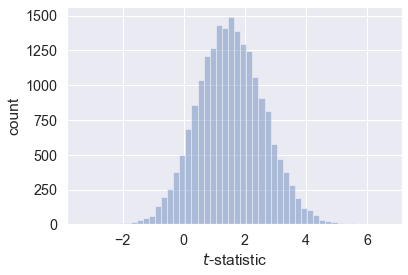

In [37]:
fig, ax = plt.subplots()
sns.distplot(tstat,kde=False)
ax.set_xlabel(r"$t$-statistic")
ax.set_ylabel("count")


In [38]:
print(tstat)

[[ 1.18710005  1.6691269 ]
 [ 2.09773063  0.93962495]
 [-0.31046402  3.31378239]
 ...
 [ 2.23205077  1.38324454]
 [ 0.821003    2.46931811]
 [ 1.38538269  1.42562785]]


In [39]:
print(np.mean(tstat))

1.5339735221496063


In [41]:
print(np.std(tstat))

1.0855167327413149
